In [1]:
# Shapiro test

In [9]:
import pandas as pd
from scipy.stats import shapiro

In [13]:
### Load the datasets
# File paths
with_tree_path = "C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Summer/with tree.xlsx"
full_green_path = "C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Summer/full green.xlsx"
no_greenery_path = "C:/Users/golna.GOLNAZ/Desktop/Result/building temperature/Summer/no greenery.xlsx"

# Load the datasets
with_tree_df = pd.read_excel(with_tree_path)
full_green_df = pd.read_excel(full_green_path)
no_greenery_df = pd.read_excel(no_greenery_path)

In [14]:
#Shapiro test for whole dataset. combining the temperatures of all buildings at 18 as one single data set and then test the normality
# Function to combine all building temperature columns into a single series

In [17]:
def combine_temperatures(df):
    combined_series = pd.Series(dtype=float)
    for column in df.columns:
        if column.endswith('(°C)'):  # assuming temperature columns end with '(°C)'
            combined_series = combined_series.append(df[column], ignore_index=True)
    return combined_series

# Combining temperature data from all buildings in each scenario
combined_with_tree = combine_temperatures(with_tree_df)
combined_full_green = combine_temperatures(full_green_df)
combined_no_greenery = combine_temperatures(no_greenery_df)

# Shapiro-Wilk Test for each combined dataset
shapiro_with_tree = shapiro(combined_with_tree)
shapiro_full_green = shapiro(combined_full_green)
shapiro_no_greenery = shapiro(combined_no_greenery)

# Collecting results in a DataFrame for better visualization
shapiro_results_df = pd.DataFrame({
    'Scenario': ['With Trees', 'Full Green', 'No Greenery'],
    'Shapiro Statistic': [shapiro_with_tree[0], shapiro_full_green[0], shapiro_no_greenery[0]],
    'p-value': [shapiro_with_tree[1], shapiro_full_green[1], shapiro_no_greenery[1]]
})

shapiro_results_df

C:\Users\golna.GOLNAZ\AppData\Local\Temp\ipykernel_25764\1181915157.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_series = combined_series.append(df[column], ignore_index=True)
C:\Users\golna.GOLNAZ\AppData\Local\Temp\ipykernel_25764\1181915157.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_series = combined_series.append(df[column], ignore_index=True)
C:\Users\golna.GOLNAZ\AppData\Local\Temp\ipykernel_25764\1181915157.py:5: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_series = combined_series.append(df[column], ignore_index=True)


,Scenario,Shapiro Statistic,p-value
0,With Trees,0.915994,1.051826e-17
1,Full Green,0.913487,5.683455e-18
2,No Greenery,0.918658,2.052525e-17


In [18]:
# Boxplot

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

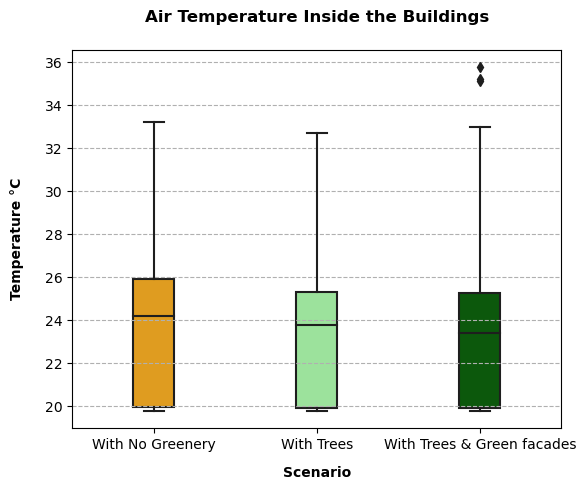

In [20]:
# combined data set
temp_data_combined = pd.DataFrame({
    'With Trees': combined_with_tree,                          #with_tree_temp_building,
    'With Trees & Green facades': combined_full_green,         #full_green_temp_building,  
    'With No Greenery':  combined_no_greenery,                 #no_greenery_temp_building  
})

# Melting the DataFrame to long format
temp_data_long = temp_data_combined.melt(var_name='Scenario', value_name='Temperature')

# Defining the new order and color palette
order = ['With No Greenery', 'With Trees', 'With Trees & Green facades']
palette = ['orange', 'lightgreen', 'darkgreen']

plt.figure(figsize=(6, 5))
sns.boxplot(x='Scenario', y='Temperature', width=1/4, data=temp_data_long, palette=palette, order=order)
plt.title('Air Temperature Inside the Buildings', fontweight='bold', pad=20)
plt.ylabel('Temperature °C', fontweight='bold', labelpad=15)
plt.xlabel('Scenario', fontweight='bold', labelpad=10)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()